In [3]:
#Import relevant libraries
import math
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Parametric Correlation Analysis: Pearson Correlation


*   Uncover linear relationships between variables
*   Can't be used to rule out possible nonlinear relationships



In [32]:
#Load housing price dataset
data = pd.read_excel("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/HousePricePrediction.xlsx")
data = data.dropna() #drop null columns
data.info()
#Find Null Values
data.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   object 
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 159.7+ KB


Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
cont_columns = data.select_dtypes(include=[np.float, 'int64'])

<ipython-input-12-67ad77724ec3>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cont_columns = data.select_dtypes(include=[np.float, 'int64'])


In [21]:
cont_columns.corr()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.011156,-0.033226,0.012609,-0.012713,-0.021998,-0.005968,-0.015415,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,-0.059316,0.027850,0.040581,-0.065649,-0.238518,-0.084284
LotArea,-0.033226,-0.139781,1.000000,-0.005636,0.014228,0.013788,0.111170,0.260833,0.263843
OverallCond,0.012609,-0.059316,-0.005636,1.000000,-0.375983,0.073741,0.040229,-0.171098,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,-0.375983,1.000000,0.592855,-0.049107,0.391452,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.073741,0.592855,1.000000,-0.067759,0.291066,0.507101
BsmtFinSF2,-0.005968,-0.065649,0.111170,0.040229,-0.049107,-0.067759,1.000000,0.104810,-0.011378
TotalBsmtSF,-0.015415,-0.238518,0.260833,-0.171098,0.391452,0.291066,0.104810,1.000000,0.613581
SalePrice,-0.021917,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


<Axes: >

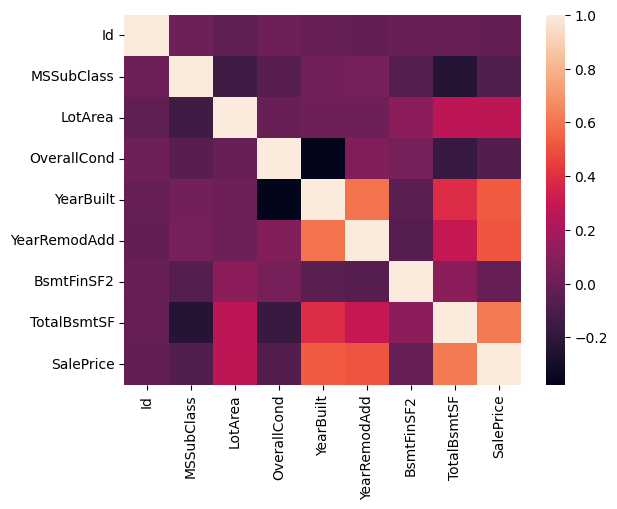

In [20]:
#plot correlations between continuous columns
sns.heatmap(cont_columns.corr())

We see that:

*  YearBuilt variable is correlated with SalePrice, TotalBsmtSF and negatively correlated with OverallCond
*  YearRemodAdd is positively correlated with SalePrice, TotalBsmtSF, YearBuilt
*  LotArea is somewhat correlated with SalePrice and TotalBsmtSF
* SalePrice is correlated with TotalBsmtSF, YearRemodAdd, YearBuilt, LotArea

## 1. Non-Parametric Correlation Analysis


*   Find relationships between categorical, nonlinearly related, non-normally distributed variables

### 1.a Spearman's rank correlation



*   Converts ordinal variables into variable pairs and finds the R (similar to Pearson's correlation) correlation between the pairs
*   The pairs are then ranked according to the strength of correlation between them

Assumptions:

* Variables are ordinal
* Variables related nonlinearly
* Variables not distributed normally


In [41]:
#Compute spearman rank correlation using scipy
from scipy.stats import spearmanr
r, p = spearmanr(data["MSZoning"], data["SalePrice"])
print('Spearman Rank Correlation between MSZoning and SalePrice is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["BldgType"], data["SalePrice"])
print('Spearman Rank Correlation between BldgType and SalePrice is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["LotConfig"], data["SalePrice"])
print('Spearman Rank Correlation between LotConfig and SalePrice is %0.3f and p-value is %0.3f' % (r,p))

r, p = spearmanr(data["Exterior1st"], data["SalePrice"])
print('Spearman Rank Correlation between Exterior1st and SalePrice is %0.3f and p-value is %0.3f' % (r,p))

Spearman Rank Correlation between MSZoning and SalePrice is -0.335 and p-value is 0.000
Spearman Rank Correlation between BldgType and SalePrice is -0.120 and p-value is 0.000
Spearman Rank Correlation between LotConfig and SalePrice is -0.074 and p-value is 0.005
Spearman Rank Correlation between Exterior1st and SalePrice is 0.068 and p-value is 0.009


### 1.b Chi-square tables

* Checks whether variables are not independent of each other. p < 0.05 -> reject null hypothesis and concludes that the variables are related

Assumptions

* Variables are categorical or numeric
* Categorical variables are binned


In [45]:
from scipy.stats import chi2_contingency

#Create crosstab
table = pd.crosstab(data["MSZoning"], data["SalePrice"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-squared statistic for MSZoning and SalePrice %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["BldgType"], data["SalePrice"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-squared statistic for BldgType and SalePrice %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["LotConfig"], data["SalePrice"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-squared statistic for LotConfig and SalePrice %0.3f and p-value is %0.3f' % (chi2, p))

table = pd.crosstab(data["Exterior1st"], data["SalePrice"])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-squared statistic for Exterior1st and SalePrice %0.3f and p-value is %0.3f' % (chi2, p))


Chi-squared statistic for MSZoninf and SalePrice 3147.891 and p-value is 0.000
Chi-squared statistic for BldgType and SalePrice 2354.025 and p-value is 1.000
Chi-squared statistic for LotConfig and SalePrice 2771.985 and p-value is 0.046
Chi-squared statistic for Exterior1st and SalePrice 8712.733 and p-value is 1.000


# 2. Data Transformations

There are two main ways to prepare data for analysis

* Normalization: value of obervation/sum of all observations
* Standardization: rescale data to have 0 mean and unit variance

In [55]:
#Let's look at sale price and reshape it as a 1 column matrix
sale_price = data['SalePrice'].values.reshape(-1,1)

### 2.a Normalization

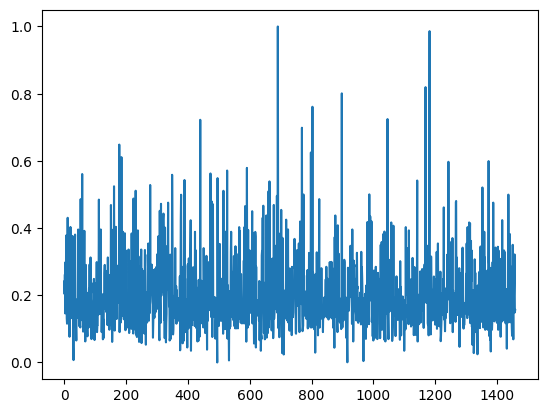

In [54]:
from sklearn import preprocessing
from sklearn.preprocessing import scale

#Use min max to scale the variable to a defined range by default that range is 0 to 1
scaled = preprocessing.MinMaxScaler()
scaled_sale_price = scaled.fit_transform(sale_price)

#Plot to take a look at the scaled data and check that the values range between 0 and 1
plt.plot(scaled_sale_price)

### 2.b Standardization

In [56]:
#Let's look at sale price and reshape it as a 1 column matrix
sale_price = data['SalePrice'].values.reshape(-1,1)

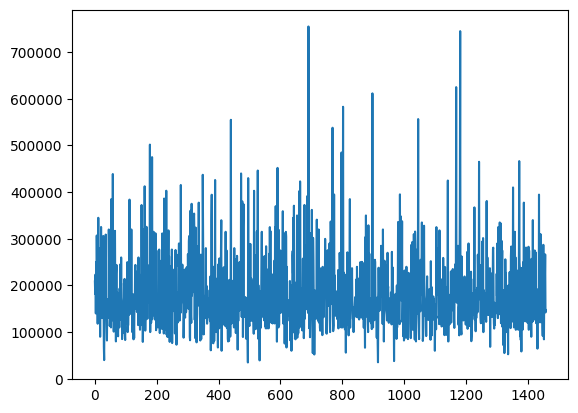

In [57]:
from sklearn import preprocessing
from sklearn.preprocessing import scale

#Use scale function to scale the variable
standard_sale_price = scale(sale_price, axis=0, with_mean=False, with_std=False)

#Plot to take a look at the scaled data and check that the values range between 0 and 1
plt.plot(standard_sale_price)

# 3. Outlier Detection

### 3.a Univariate Detection

* Tukey Method: Uses boxplots to detect outliers. Points outside the 1.5IQR are considered to be outliers and are the dots above or below the boxplots

* Tukey outlier labeling: Calculate outliers mathematically using the above and label them

Text(0.5, 1.0, 'Boxplot of the sale price')

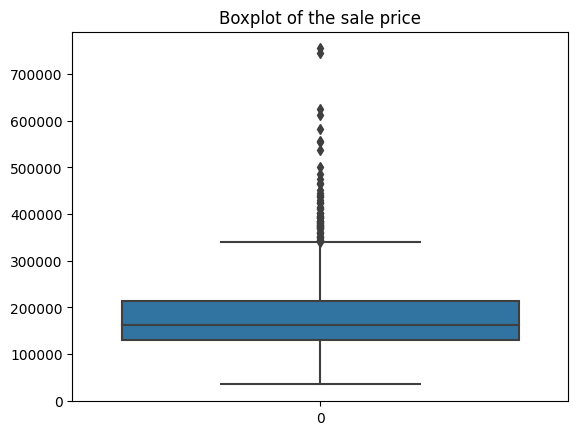

In [69]:
#Create boxplots
sns.boxplot(data['SalePrice']).set_title('Boxplot of the sale price')

In [72]:
#Calculate the interquartile range to find outliers
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [76]:
sale_price_outliers = data[data['SalePrice'] > upper]['SalePrice']

In [77]:
sale_price_outliers

11      345000.0
53      385000.0
58      438780.0
112     383970.0
151     372402.0
          ...   
1268    381000.0
1353    410000.0
1373    466500.0
1388    377500.0
1437    394617.0
Name: SalePrice, Length: 61, dtype: float64

### 3.b Multivariate Detection

* Tukey Method: Uses boxplots to detect outliers. Points outside the 1.5IQR are considered to be outliers and are the dots above or below the boxplots.



Text(0.5, 1.0, 'Boxplot of the sale price')

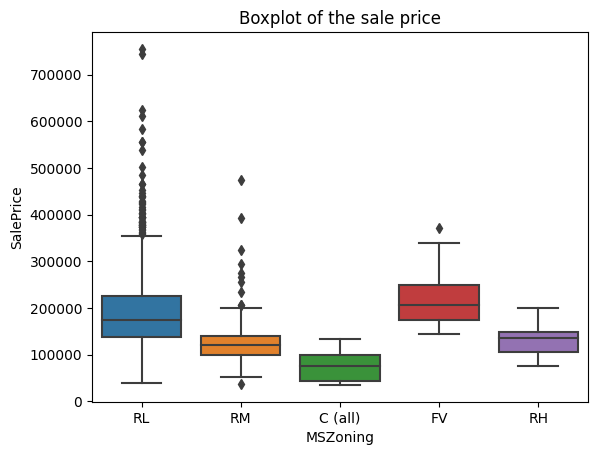

In [78]:
#Create boxplots with two variables. From out Non-parametric correlation analysis we found that SalePrice and MSZoning were significantly correlated
sns.boxplot(x=data["MSZoning"], y=data['SalePrice']).set_title('Boxplot of the sale price')

In [79]:
data = pd.read_csv("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/mtcars.csv")

In [95]:
IQR = -(1.714 -1.936)
lower = 1.714 - 1.5 * IQR
upper = 1.936 + 1.5 * IQR

In [96]:
lower

1.381